# -----------------!! HEART DISEASE PREDICTION !!----------------

--> This project is used to predict which patients are most likely to suffer from  a heart disease in the near future using the features given.

# step 1:Import required libraries

In [422]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Step 2: load the dataset

In [423]:
df=pd.read_csv("C:\\Users\\prane\\Documents\\Downloads\\Heart_Disease_Prediction.csv")

In [424]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [425]:
df.head()  #shows first five rows

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [426]:
df.tail() #shows last five rows

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [427]:
df.shape

(270, 14)

In [428]:
df.info() # gives information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [429]:
df.describe() # it gives statistical summary of the dataset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [430]:
df.columns # shows all the columns of the dataset

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [431]:
df.dtypes # shows datatypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [432]:
df.isnull().sum() # shows missing values

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

# step 3:Data preprocessing

In [433]:
df.isnull().sum().any() # no null values

False

In [434]:
df.duplicated().sum() # no duplicates

0

In [435]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [436]:
print(df['Heart Disease'].unique())

['Presence' 'Absence']


In [437]:
# changing the datatype

df['ST depression'] = df['ST depression'].astype(int)


In [438]:
df.dtypes

Age                         int64
Sex                         int64
Chest pain type             int64
BP                          int64
Cholesterol                 int64
FBS over 120                int64
EKG results                 int64
Max HR                      int64
Exercise angina             int64
ST depression               int32
Slope of ST                 int64
Number of vessels fluro     int64
Thallium                    int64
Heart Disease              object
dtype: object

In [439]:
# renaming the columns name
df=df.rename(columns={'BP':'Blood_pressure'})

In [440]:
df.head()

,Age,Sex,Chest pain type,Blood_pressure,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0,1,1,3,Absence


In [418]:
df.skew()

Age                       -0.163615
Sex                       -0.765084
Chest pain type           -0.878767
Blood_pressure             0.722618
Cholesterol                1.183721
FBS over 120               1.991971
EKG results               -0.044703
Max HR                    -0.527737
Exercise angina            0.728915
ST depression              1.652475
Slope of ST                0.543151
Number of vessels fluro    1.209890
Thallium                   0.362905
Heart Disease              0.224858
dtype: float64

#  Step 4:Exploratory Data Analysis

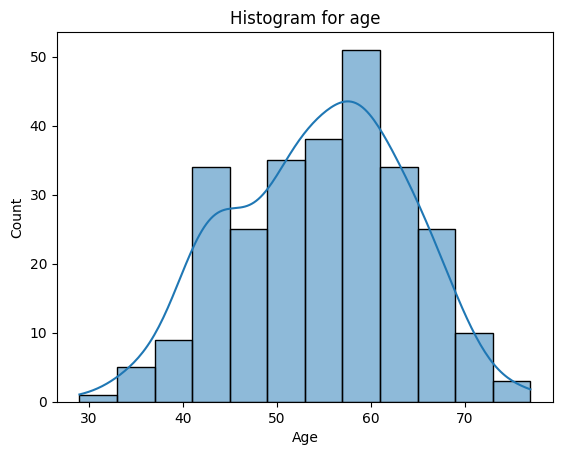

In [441]:
# univariate visualization
# univariate analysis for numerical features 
# histogram for age
sns.histplot(df['Age'],kde=True)
plt.title('Histogram for age')
plt.show()

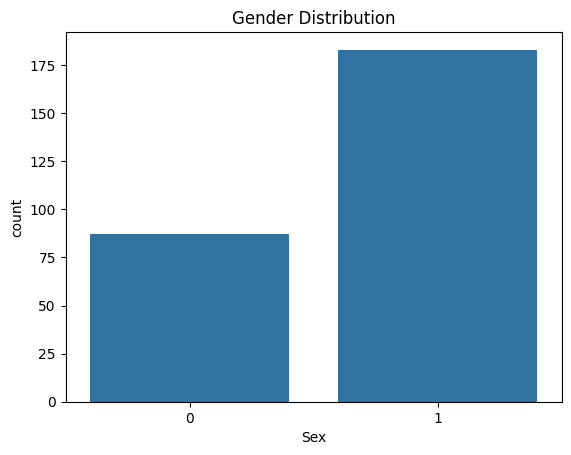

In [442]:
# univariant analysis for categorical features
sns.countplot(x='Sex',data=df)
plt.title('Gender Distribution')
plt.show()

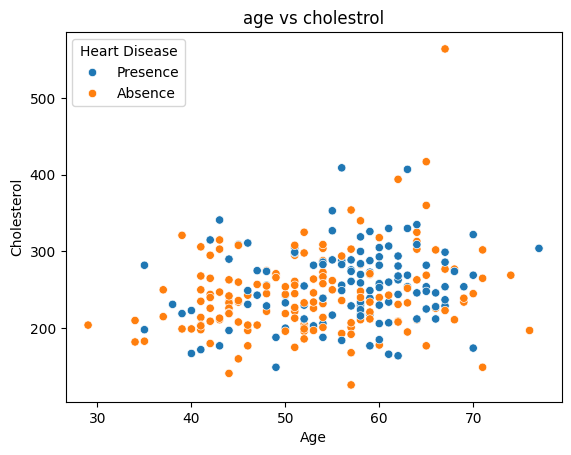

In [443]:
# bivariant visualization
sns.scatterplot(x='Age',y='Cholesterol',hue='Heart Disease',data=df)
plt.title('age vs cholestrol')

plt.show()

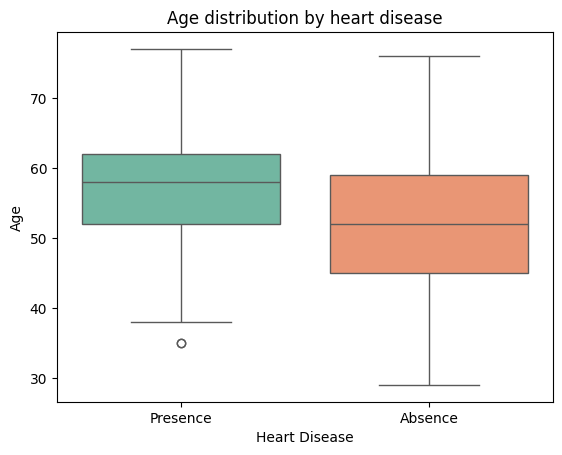

In [449]:
# boxplot 
sns.boxplot(x='Heart Disease',y='Age',data=df,hue='Heart Disease',palette='Set2')
plt.title('Age distribution by heart disease')

plt.show()



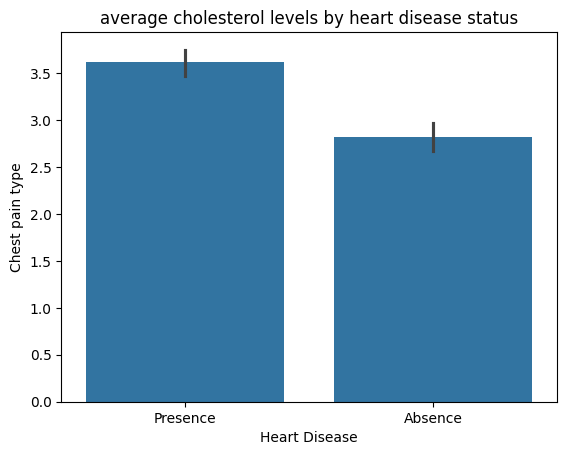

In [415]:
#barplot
sns.barplot(x='Heart Disease',y='Chest pain type',data=df)
plt.title("average cholesterol levels by heart disease status")
plt.show()

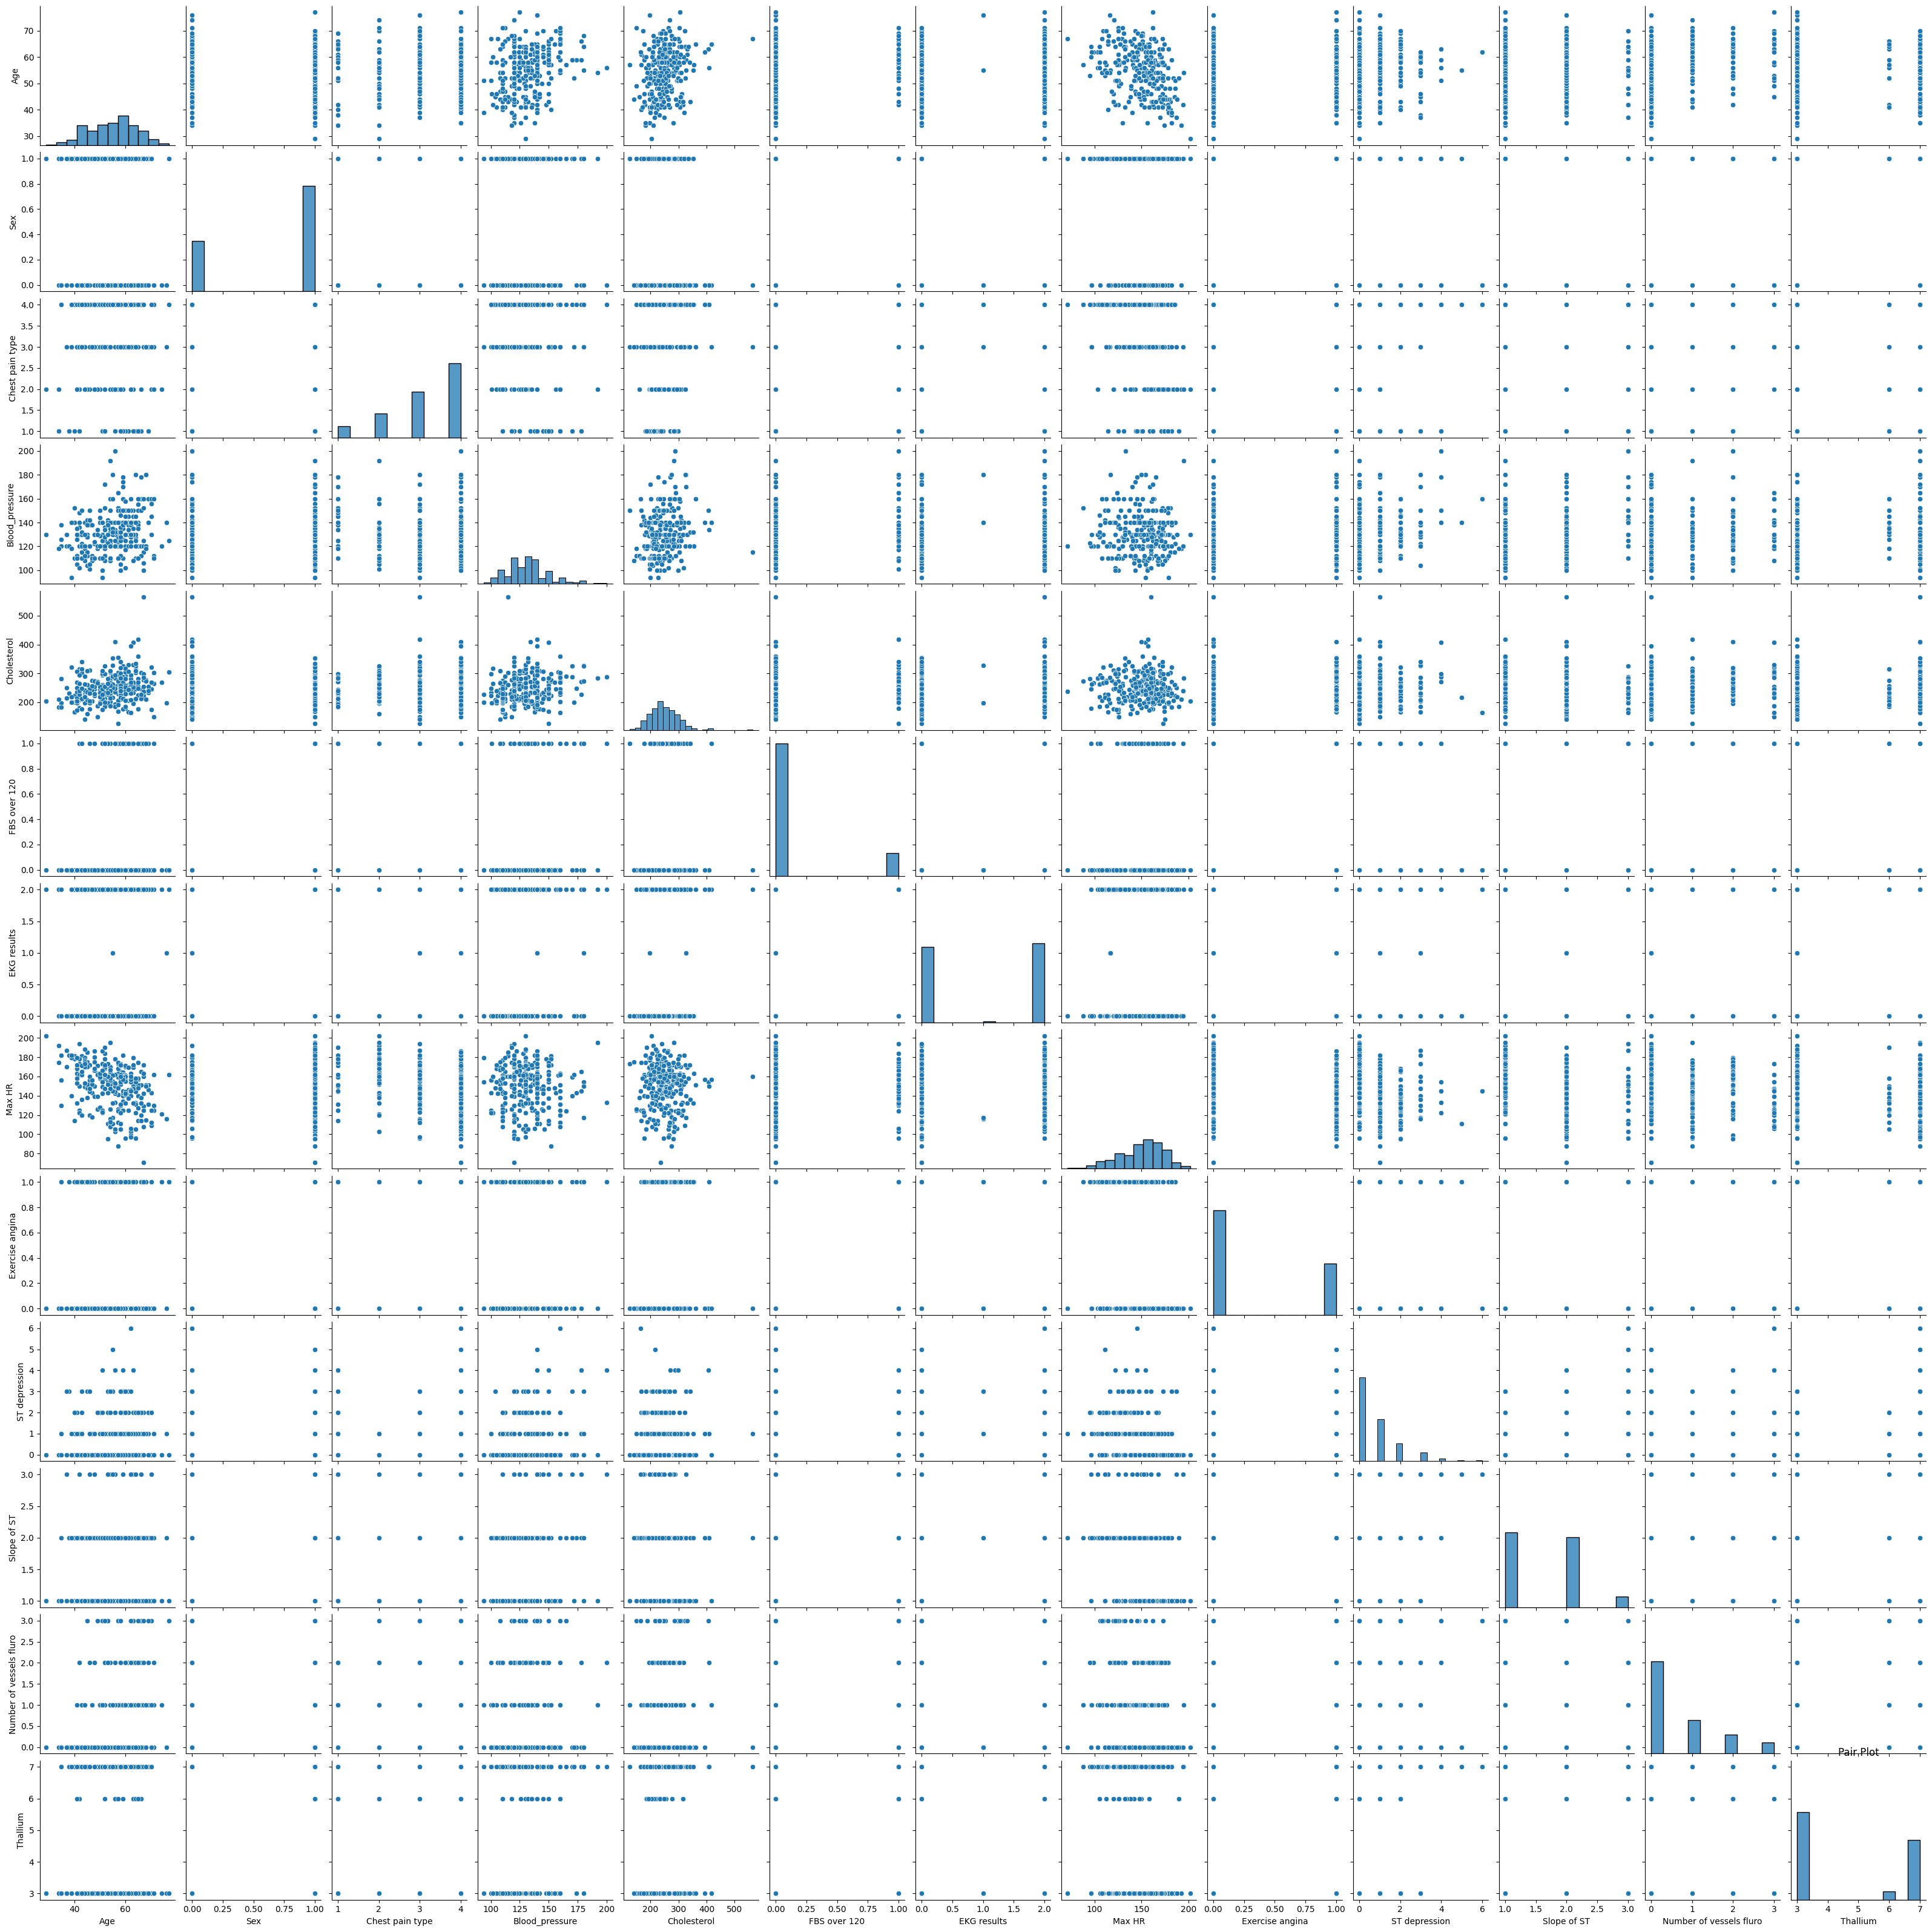

In [416]:
# multivariant visualization
# pair plot
sns.pairplot(df)
plt.title('Pair Plot')
plt.show()

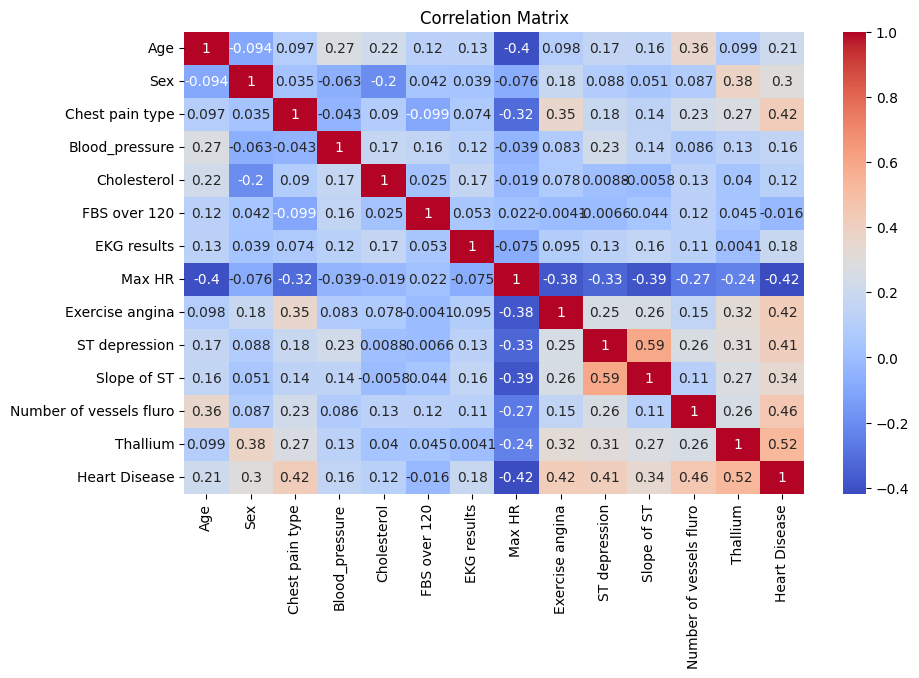

In [372]:
plt.figure(figsize = [10,6])
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Step 5: Feature Engineering

In [417]:
# converting catagorical data into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Heart Disease'] = le.fit_transform(df['Heart Disease'])
categorical_columns = ['Chest pain type', 'EKG results', 'Slope of ST', 'Thallium']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


df.head()


,Age,Sex,Chest pain type,Blood_pressure,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,3,130,322,0,2,109,0,2,1,3,0,1
1,67,0,2,115,564,0,2,160,0,1,1,0,2,0
2,57,1,1,124,261,0,0,141,0,0,0,0,2,1
3,64,1,3,128,263,0,0,105,1,0,1,1,2,0
4,74,0,1,120,269,0,2,121,1,0,0,1,0,0


# Feature Scaling

In [285]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numerical_columns = ['Age','Blood_pressure','Cholesterol','ST depression', 'Max HR']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,Age,Sex,Chest pain type,Blood_pressure,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0.854167,1,3,0.339623,0.447489,0,2,0.290076,0,0.333333,1,3,0,1
1,0.791667,0,2,0.198113,1.000000,0,2,0.679389,0,0.166667,1,0,2,0
2,0.583333,1,1,0.283019,0.308219,0,0,0.534351,0,0.000000,0,0,2,1
3,0.729167,1,3,0.320755,0.312785,0,0,0.259542,1,0.000000,1,1,2,0
4,0.937500,0,1,0.245283,0.326484,0,2,0.381679,1,0.000000,0,1,0,0


# Step 6: Divide data into X and Y


In [287]:
#Divide the data into X amd Y variable
x=df.drop("Heart Disease",axis=1)
y=df['Heart Disease']

In [288]:
x

,Age,Sex,Chest pain type,Blood_pressure,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,0.854167,1,3,0.339623,0.447489,0,2,0.290076,0,0.333333,1,3,0
1,0.791667,0,2,0.198113,1.000000,0,2,0.679389,0,0.166667,1,0,2
2,0.583333,1,1,0.283019,0.308219,0,0,0.534351,0,0.000000,0,0,2
3,0.729167,1,3,0.320755,0.312785,0,0,0.259542,1,0.000000,1,1,2
4,0.937500,0,1,0.245283,0.326484,0,2,0.381679,1,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1,2,0.735849,0.166667,1,0,0.694656,0,0.000000,0,0,2
266,0.312500,1,1,0.245283,0.312785,0,0,0.778626,0,0.000000,0,0,2
267,0.562500,0,1,0.433962,0.383562,0,2,0.625954,0,0.166667,1,0,0
268,0.583333,1,3,0.433962,0.150685,0,0,0.587786,0,0.000000,1,0,1


In [289]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int32

# Step 7:Split the data into train and test

In [290]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [291]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

# Step 8: Train the model

# Logistic Regression Algorithm

In [324]:
# importing model library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,ConfusionMatrixDisplay


In [293]:
 # initializing Logistic Regression
log_reg = LogisticRegression(max_iter=200)


In [294]:
#Training the model
log_reg.fit(x_train, y_train) 

LogisticRegression(max_iter=200)

In [314]:
# Predict the target variable using the test data
y_pred1 = log_reg.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy1

0.9259259259259259

In [296]:
# classification report
class_report = classification_report(y_test,y_pred1)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.81      0.89        21

    accuracy                           0.93        54
   macro avg       0.95      0.90      0.92        54
weighted avg       0.93      0.93      0.92        54



In [297]:
cm = confusion_matrix(y_test, y_pred1)
print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[33  0]
 [ 4 17]]


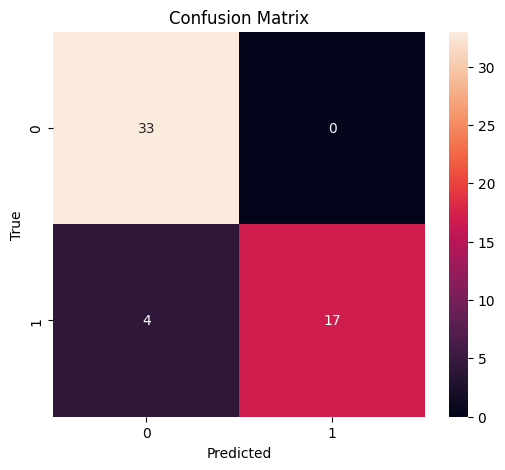

In [298]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# KNN ALgorithm

In [299]:
# importing model library
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier 
clf = KNeighborsClassifier(n_neighbors=10, metric='euclidean') 


In [300]:
# Train the model using the training data
clf.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [301]:
# Predict the target variable using the test data
y_pred = clf.predict(x_test)
#accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8888888888888888

In [302]:
# classification report
class_report = classification_report(y_test,y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



In [303]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[31  2]
 [ 4 17]]


In [304]:
## Function For Finding K-Value
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf =  KNeighborsClassifier(n_neighbors = i)
        clf.fit(x_train,y_train)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(x_test)
        tmp = f1_score(tmp,y_test)
        error = 1-tmp
        test_error.append(error)
    
    return test_error
K = range(6, 20, 2)
# calling above defined function
test = Elbow(K)

Text(0.5, 1.0, 'Elbow Curve for test')

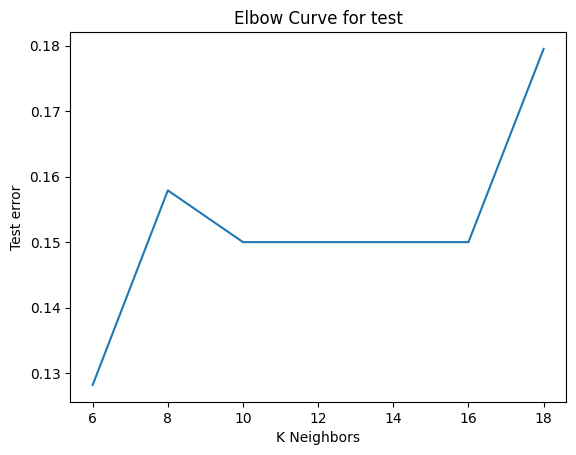

In [305]:
# plotting the Curves
plt.plot(K, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

# Decision tree algorithm

In [329]:
# importing model library
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
DT = DecisionTreeClassifier() 
# Train the model using the training data
DT.fit(x_train, y_train) 

DecisionTreeClassifier()

In [330]:
# Predict the target variable using the test data
y_pred = DT.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7037037037037037

In [331]:
# classification report
class_report = classification_report(y_test,y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        33
           1       0.62      0.62      0.62        21

    accuracy                           0.70        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54



In [336]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')


Confusion Matrix:
[[25  8]
 [ 8 13]]


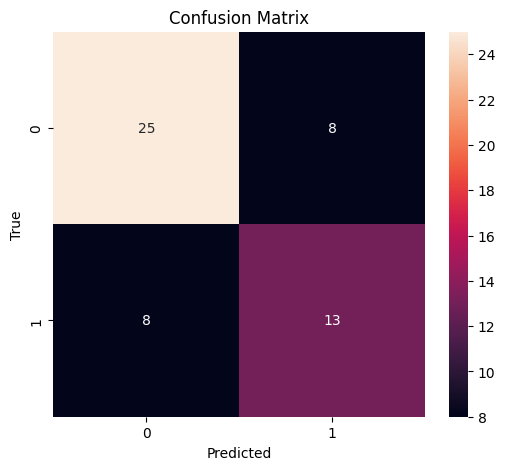

In [337]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

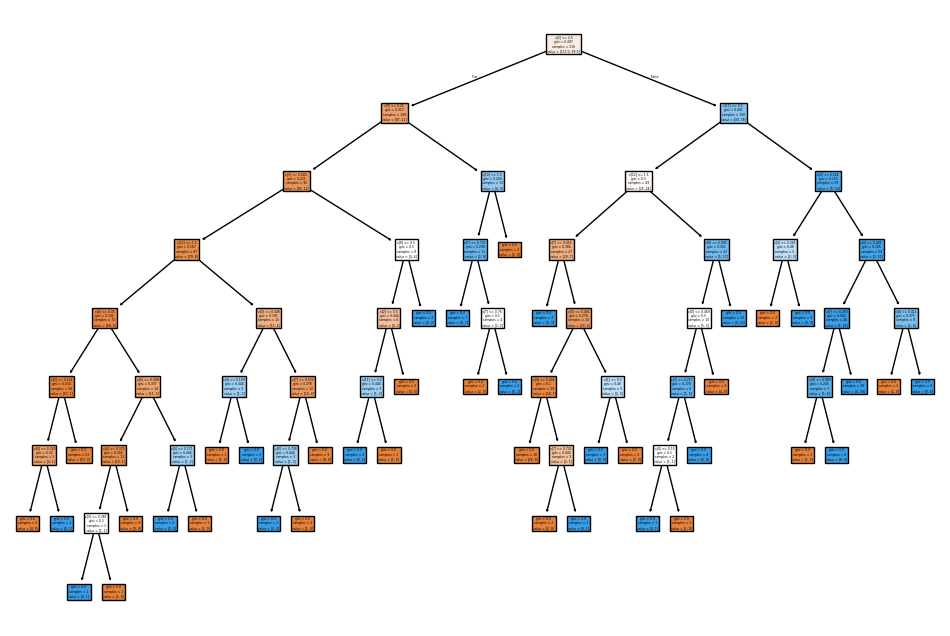

In [333]:
from sklearn import tree
plt.figure(figsize=(12, 8))
feature_names = x.columns
tree.plot_tree(DT, filled=True)
plt.show()

# SVM algorithm

In [238]:
# importing model library
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model using the training data
svm_classifier.fit(x_train, y_train) 

# Predict the target variable using the test data
y_pred = svm_classifier.predict(x_test)


In [239]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8518518518518519

In [240]:
# classification report
class_report = classification_report(y_test,y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        33
           1       0.93      0.67      0.78        21

    accuracy                           0.85        54
   macro avg       0.88      0.82      0.83        54
weighted avg       0.86      0.85      0.85        54



In [241]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[32  1]
 [ 7 14]]


# Random Forest Algorithm

In [245]:
# importing model library
from sklearn.ensemble import RandomForestClassifier

 # Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [246]:
# Train the model using the training data
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [247]:
# Predict the target variable using the test data
y_pred = rf_classifier.predict(x_test)
# accuracy
accuracy = accuracy_score(y_test, y_pred) 
accuracy

0.8148148148148148

In [248]:
# classification report
class_report = classification_report(y_test,y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.87      0.62      0.72        21

    accuracy                           0.81        54
   macro avg       0.83      0.78      0.79        54
weighted avg       0.82      0.81      0.81        54



In [476]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[31  2]
 [ 8 13]]


# Adaboost classifier

In [281]:
# importing model library
from sklearn.ensemble import AdaBoostClassifier


In [283]:
 # Initialize the Random Forest Classifier
ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)


In [285]:
# Train the model using the training data
ada_boost_classifier.fit(x_train, y_train) 

AdaBoostClassifier(random_state=42)

In [287]:
# Predict the target variable using the test data
y_pred = ada_boost_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) # Evaluate the model's performance
accuracy

0.8518518518518519

In [289]:
# classification report
class_report = classification_report(y_test,y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.84      0.76      0.80        21

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54



# Gradient Boost CLassifier

In [305]:
# importing model 
from sklearn.ensemble import GradientBoostingClassifier

In [307]:
# Initialize the model
model = GradientBoostingClassifier(random_state=42)

In [309]:
# Train the model
model.fit(x_train, y_train)


GradientBoostingClassifier(random_state=42)

In [311]:
# Predictions
y_pred = model.predict(x_test)

In [313]:
# accuracy
accuracy = accuracy_score(y_test, y_pred) 
accuracy

0.8518518518518519

In [316]:
# classification report
class_report = classification_report(y_test,y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        33
           1       0.93      0.67      0.78        21

    accuracy                           0.85        54
   macro avg       0.88      0.82      0.83        54
weighted avg       0.86      0.85      0.85        54

